In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

loading the data set and defining features and targets

In [9]:
file_path = r"C:\Users\91944\OneDrive - Indian Institute of Technology Indian School of Mines Dhanbad\Desktop\ml\linear_regression_train.csv"
data = pd.read_csv(file_path)

data = data.drop(columns=['ID'])

X = data.drop(columns=['Target']).values  
y = data['Target'].values  

X = np.c_[np.ones(X.shape[0]), X]

splitting the data set into training and testing data set 

In [10]:
def train_test_split(x, y, test_size=0.2,random_state=None):
    if random_state is not None :
        np.random.seed(random_state)
    indices=np.arange(X.shape[0])
    np.random.shuffle(indices)

    test_size=int(len(indices)*test_size)
    test_indices=indices[:test_size]
    train_indices=indices[test_size:]
    return x[train_indices],x[test_indices],y[train_indices],y[test_indices]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

cost function 

In [11]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X @ theta
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost


gradient descent algorithm 

In [12]:
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []  # To store the cost at each iteration

    for _ in range(iterations):
        predictions = X @ theta
        gradients = (1 / m) * X.T @ (predictions - y)
        theta -= learning_rate * gradients
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history

error calculating 

In [13]:
def calculate_mse(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

training the data set 

In [15]:
m, n = X_train.shape  
theta = np.zeros(n)        
learning_rate = 0.00002   
iterations = 2500

theta, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, iterations)

y_test_predicted = X_test @ theta

print("Final cost after training:", cost_history[-1])

test_mse = calculate_mse(y_test, y_test_predicted)
print("Mean Squared Error on the test set:", test_mse)


Final cost after training: 96763.95994969447
Mean Squared Error on the test set: 199681.0366282399


plotting the cost function convergence 

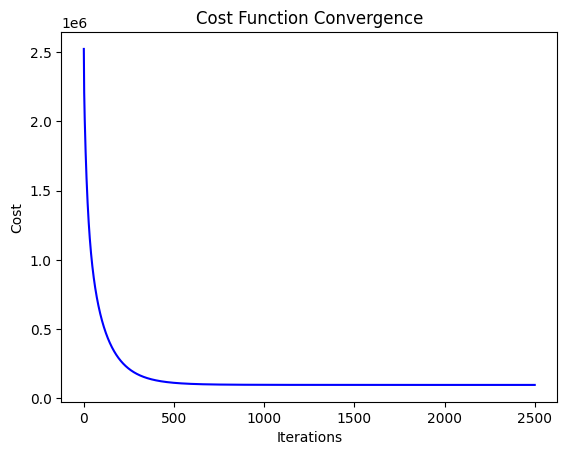

In [16]:
plt.plot(range(iterations), cost_history, color='blue')
plt.title('Cost Function Convergence')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()